In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("Student_Performance.csv")

In [4]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Splitting Data into dependent and Independent

In [6]:
x=df.drop(columns='Performance Index')

In [7]:
y=df['Performance Index']

# Encoding

#### Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called <b>feature encoding.
>Common techniques include <b>one-hot encoding, label encoding
>> * <b>One-Hot Encoding</b>: A technique used to convert categorical data into a binary format where each category is represented by a separate column with a 1 indicating its presence and 0s for all other categories. Done for <b>nominal data</b>
>>* <b>Label Encoding</b>: a technique that assigns numbers to categorical data. Done for <b>ordinal data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data=le.fit_transform(df['Extracurricular Activities'])

In [11]:
data=pd.DataFrame({"ECA":data})

In [12]:
x=pd.concat([x,data],axis=1)

In [13]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,ECA
0,7,99,Yes,9,1,1
1,4,82,No,4,2,0
2,8,51,Yes,7,2,1
3,5,52,Yes,5,2,1
4,7,75,No,8,5,0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,1
9996,7,64,Yes,8,5,1
9997,6,83,Yes,8,5,1
9998,9,97,Yes,7,0,1


#### Dropping Categorical data since it is encoded

In [14]:
x.drop("Extracurricular Activities",axis=1,inplace=True)

In [15]:
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,ECA
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
...,...,...,...,...,...
9995,1,49,4,2,1
9996,7,64,8,5,1
9997,6,83,8,5,1
9998,9,97,7,0,1


# Scaling using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
ss=StandardScaler()

In [18]:
xscaled=ss.fit_transform(x)

In [19]:
xscaled

array([[ 0.77518771,  1.70417565,  1.45620461, -1.24975394,  1.01045465],
       [-0.38348058,  0.72391268, -1.49229423, -0.90098215, -0.98965352],
       [ 1.16141048, -1.06362569,  0.27680507, -0.90098215,  1.01045465],
       ...,
       [ 0.38896495,  0.7815752 ,  0.86650484,  0.1453332 ,  1.01045465],
       [ 1.54763324,  1.5888506 ,  0.27680507, -1.59852572,  1.01045465],
       [ 0.77518771,  0.26261245,  0.86650484, -1.24975394, -0.98965352]])

# Train Test Split

#### Splitting data for training and testing (X into xtrain, xtest & Y into ytrain,ytest)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,test_size=0.2,random_state=32)

# Model Fitting using LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

In [25]:
model.fit(xtrain,ytrain)

LinearRegression()

# Predicting the Model

In [26]:
ypred=model.predict(xtest)

In [27]:
ypred

array([16.59502805, 29.98597042, 87.95278753, ..., 73.79903648,
       88.34286955, 45.31749828])

# Model Evaluation

## 1.Using Metrices

In [28]:
from sklearn.metrics import mean_absolute_error as mae ,mean_squared_error as mse,r2_score as r2,root_mean_squared_error as rmse

#### Comparing the target value given by model (modelpred) and the actual value (ytest)

> This comparison helps us evaluate the model where:
>> mae, mse and rmse should be very low and r2 score must be near to 1

In [29]:
mae(ypred,ytest)

1.6390855634943677

In [30]:
mse(ypred,ytest)

4.206410264424098

In [31]:
rmse(ypred,ytest)

2.050953501282781

In [32]:
r2(ypred,ytest)

0.9884257663294299

## 2.Residual Analysis

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
residuals=ytest-ypred

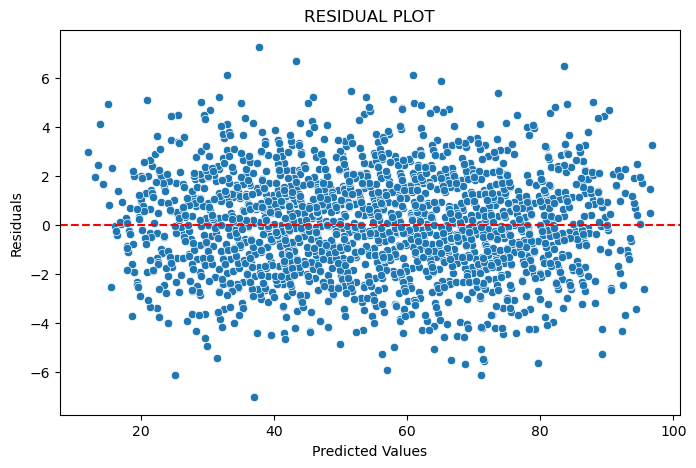

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=ypred,y=residuals)
plt.axhline(0,color='r',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("RESIDUAL PLOT")
plt.show()

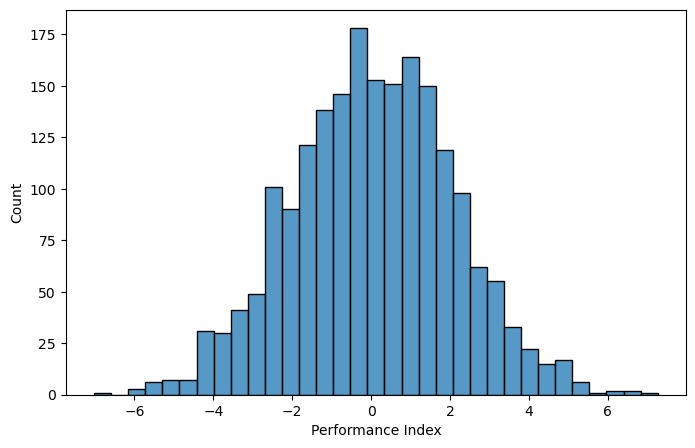

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(residuals);

### The residuals must show a normal distribution when plotted

## Saving

In [42]:
import joblib

In [43]:
joblib.dump(le,"Encoder.pkl")

['Encoder.pkl']

In [44]:
joblib.dump(model,"Model.pkl")

['Model.pkl']

In [45]:
joblib.dump(ss,"scaler.pkl")

['scaler.pkl']